In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [8]:
#Leemos la base de datos de la panadería:
database = pd.read_csv('/Users/Shanti/Desktop/My Desktop/Minería de Datos/Databases/subset_bakery.csv')
database

,date,time,transaction,item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Cookies
...,...,...,...,...
18728,2017-04-09,14:32:58,9682,Muffin
18729,2017-04-09,14:32:58,9682,Coffee
18730,2017-04-09,14:32:58,9682,Tea
18731,2017-04-09,14:57:06,9683,Coffee


In [20]:
database.dtypes

date           object
time           object
transaction     int64
item           object
dtype: object

In [9]:
txs = database.groupby(['transaction'])['item'].apply(lambda x: list(np.unique(x)))


In [10]:
txs_list = txs.values.tolist()

In [11]:
# utilizando TransactionEncoder 
te = TransactionEncoder()
txs_formatted = te.fit(txs_list).transform(txs_list)

In [12]:
df = pd.DataFrame(txs_formatted, columns=te.columns_)

In [13]:
product_max = pd.DataFrame(data = df[df.columns.values].sum(), columns = ["numVeces"])
product_max_Top10=product_max.sort_values("numVeces", ascending = False).head(10)
#Añadimos una columna de Producto:
product_max_Top10["Producto"]=product_max_Top10.index
product_max_Top10

,numVeces,Producto
Coffee,4528,Coffee
Bread,3097,Bread
Tea,1350,Tea
Cake,983,Cake
Pastry,815,Pastry
NONE,753,NONE
Sandwich,680,Sandwich
Medialuna,585,Medialuna
Hot chocolate,552,Hot chocolate
Cookies,515,Cookies


In [14]:
#Función para marcar el máximo en la gráfica de otro color
def set_custom_palette(product_max_Top10, max_color = 'crimson', other_color = 'midnightblue'):
    max_val = product_max_Top10.max()
    pal = []
    
    for item in product_max_Top10:
        if item == max_val:
            pal.append(max_color)
        else:
            pal.append(other_color)
    return pal

/var/folders/rx/7_vz3tgn179138g8671cwtnm0000gn/T/ipykernel_52339/2469549237.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  b=sns.barplot(data=product_max_Top10, x='Producto', y='numVeces',palette=set_custom_palette(product_max_Top10['numVeces']))
/var/folders/rx/7_vz3tgn179138g8671cwtnm0000gn/T/ipykernel_52339/2469549237.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  b.legend(fontsize=25)


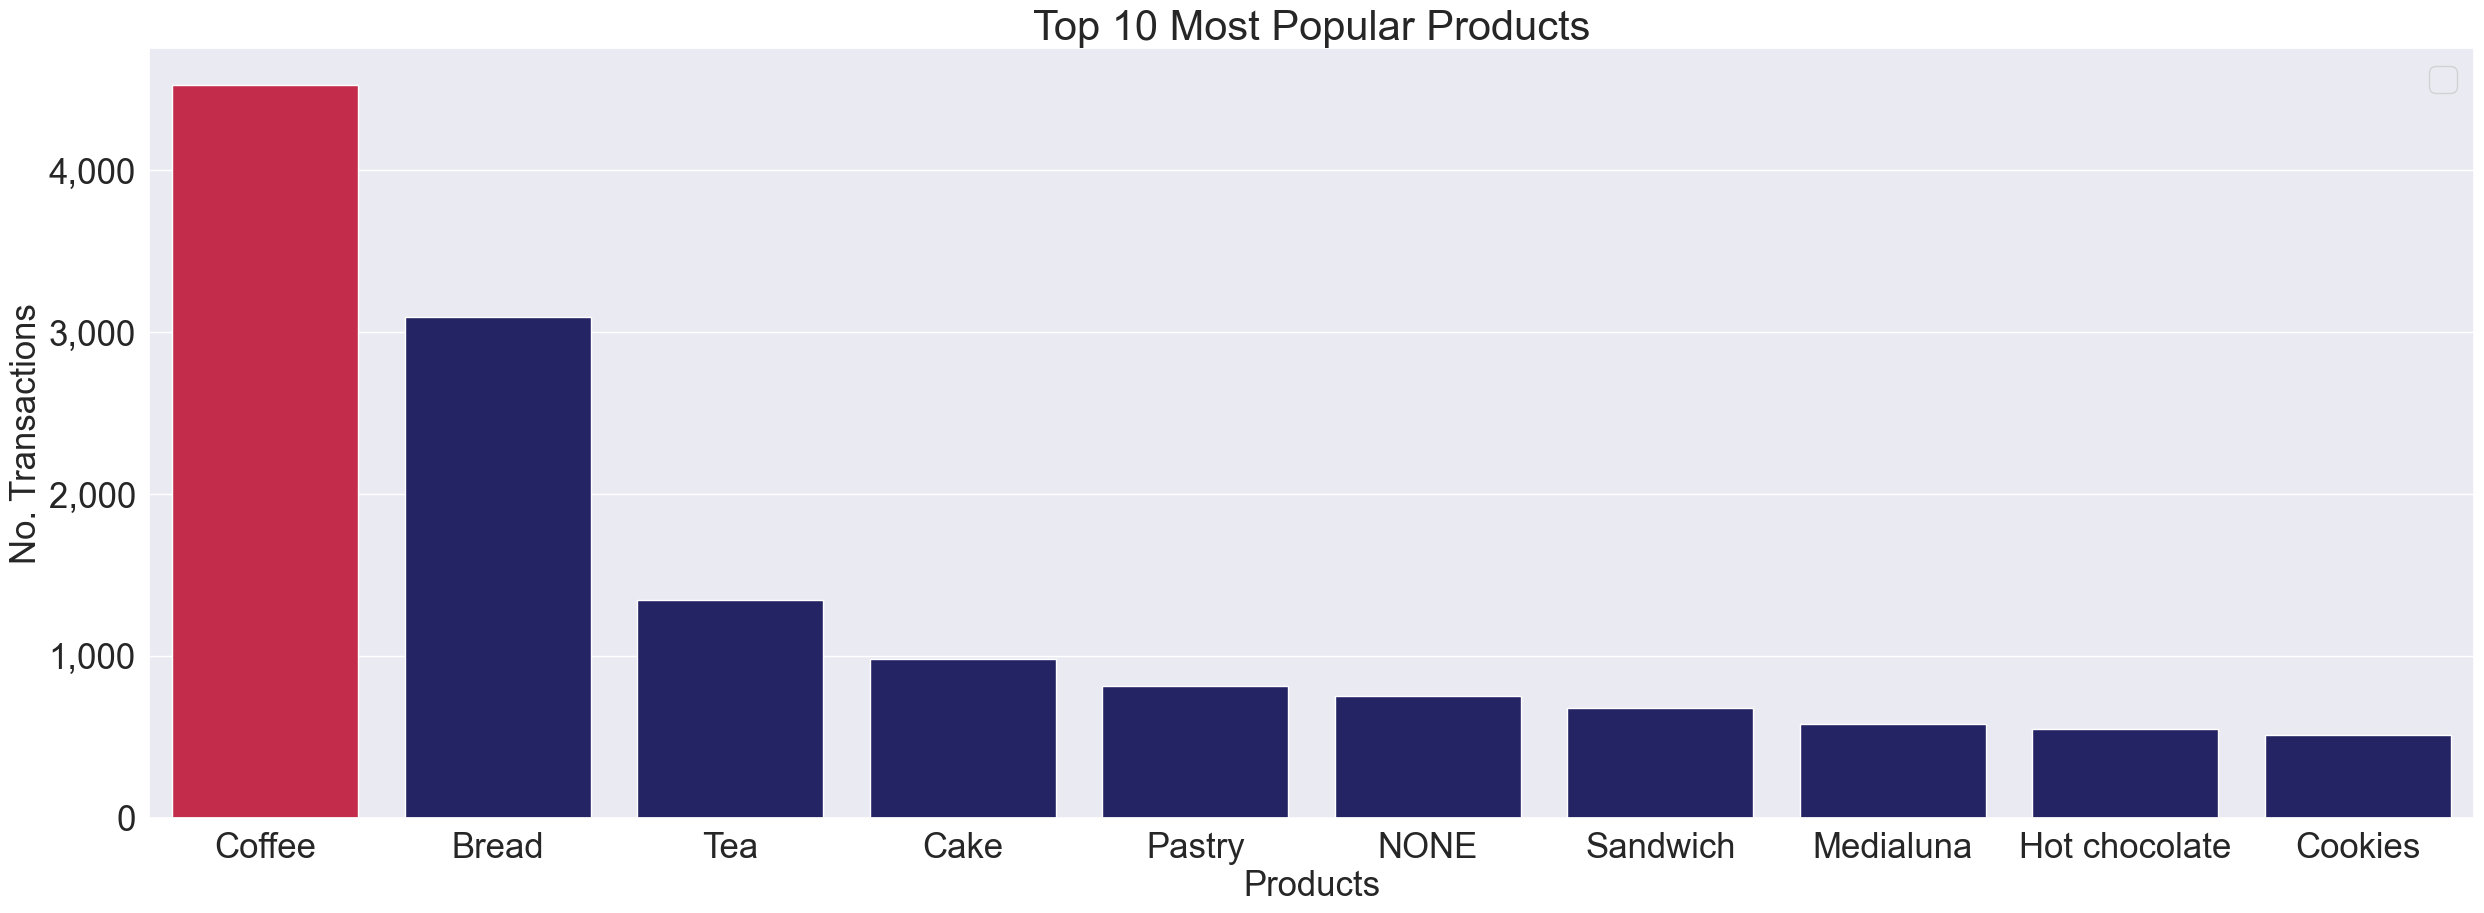

In [16]:
#Plot graph 
b=sns.barplot(data=product_max_Top10, x='Producto', y='numVeces',palette=set_custom_palette(product_max_Top10['numVeces']))
b.tick_params(axis="y", labelsize=25)
b.tick_params(axis="x", labelsize=25)
b.set_title("Top 10 Most Popular Products",fontsize=30)
b.set_xlabel("Products",fontsize=25)
b.set_ylabel("No. Transactions",fontsize=25)
b.legend(fontsize=25)
b
sns.set(rc={'figure.figsize':(30,10)})

b.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

In [17]:
apriori_df = apriori(df, min_support=0.05, use_colnames=True)
apriori_df.sort_values(by='support', ascending=False).head(5)

,support,itemsets
2,0.499504,(Coffee)
0,0.341644,(Bread)
9,0.148924,(Tea)
1,0.108439,(Cake)
10,0.093988,"(Bread, Coffee)"


In [18]:
rules_df = association_rules(apriori_df, metric="confidence", min_threshold=0.3)
rules_df

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Cake),(Coffee),0.108439,0.499504,0.057143,0.526958,1.054964,0.002977,1.058039,0.058437
1,(Tea),(Coffee),0.148924,0.499504,0.052068,0.349630,0.699954,-0.022320,0.769556,-0.334962


Text(0, 0.5, 'Confidence')

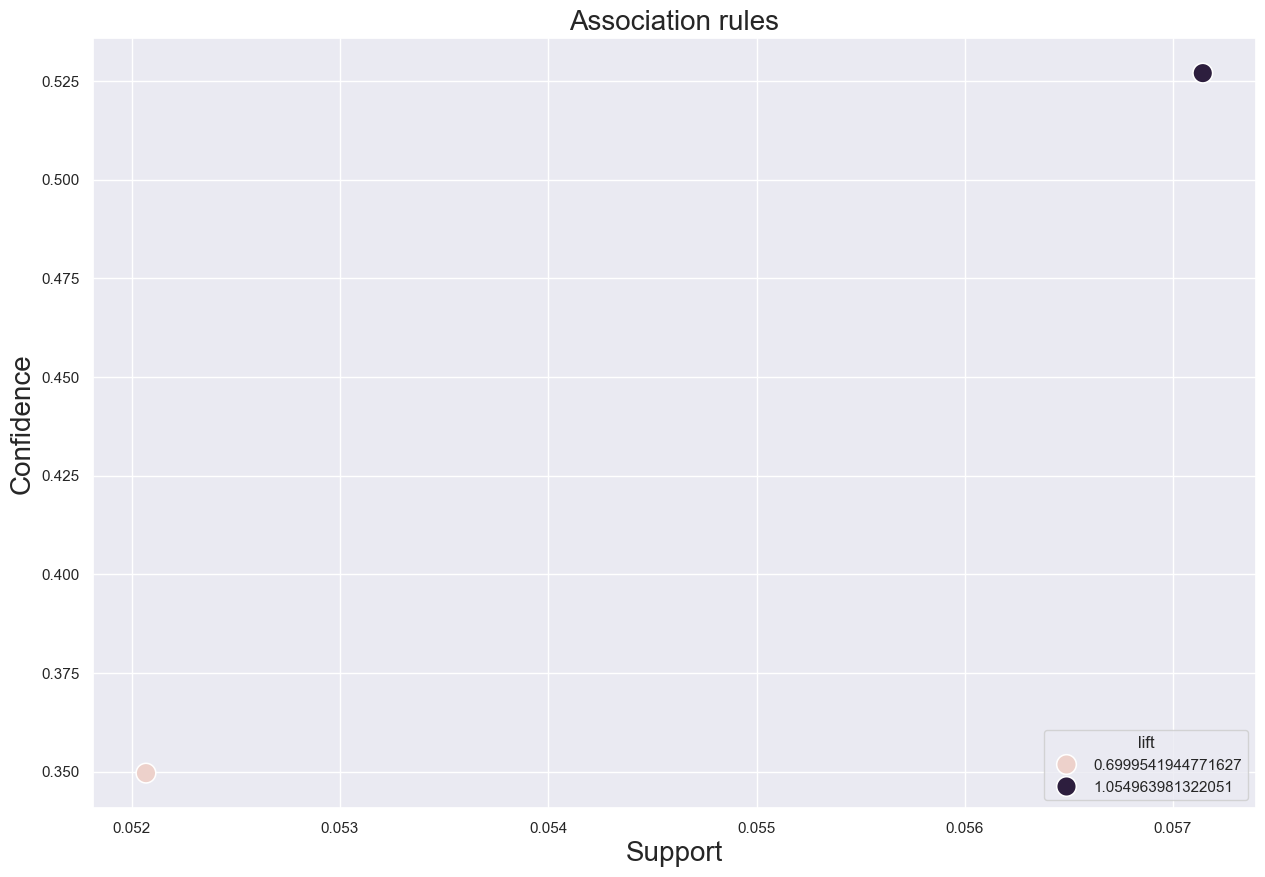

In [19]:
f, a = plt.subplots(figsize=(15,10))

a = sns.scatterplot(x="support", y="confidence", data=rules_df, hue="lift",s=200)
plt.legend(loc="lower right", title="lift")
plt.title("Association rules",fontsize=20)

a.set_xlabel("Support",fontsize=20)
a.set_ylabel("Confidence",fontsize=20)

In [6]:
# import pandas as pd
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt
# import matplotlib as mpl
# from mlxtend.preprocessing import TransactionEncoder
# from mlxtend.frequent_patterns import apriori, association_rules

# # Create a simple DataFrame
# data = {
#     'transaction': [1, 1, 1, 2, 2, 3, 3, 3, 3],
#     'item': ['bread', 'milk', 'butter', 'bread', 'butter', 'milk', 'bread', 'butter', 'cheese']
# }

# df = pd.DataFrame(data)

# # Grouping transactions and formatting data
# txs = df.groupby(['transaction'])['item'].apply(lambda x: list(np.unique(x)))
# txs_list = txs.values.tolist()
# te = TransactionEncoder()
# txs_formatted = te.fit(txs_list).transform(txs_list)
# df_encoded = pd.DataFrame(txs_formatted, columns=te.columns_)

# # Calculate product frequencies
# product_max = pd.DataFrame(data=df_encoded[df_encoded.columns.values].sum(), columns=["numVeces"])
# product_max_Top10 = product_max.sort_values("numVeces", ascending=False).head(10)
# product_max_Top10["Producto"] = product_max_Top10.index

# # Plot Top 10 Most Popular Products
# fig, ax = plt.subplots(figsize=(10, 5))
# sns.barplot(data=product_max_Top10, x='Producto', y='numVeces', palette='viridis')
# ax.set_title("Top 10 Most Popular Products")
# ax.set_xlabel("Products")
# ax.set_ylabel("No. Transactions")
# plt.show()

# # Calculate association rules
# apriori_df = apriori(df_encoded, min_support=0.1, use_colnames=True)
# rules_df = association_rules(apriori_df, metric="confidence", min_threshold=0.1)

# # Print the rules
# print(rules_df)
